# Analysis of the Error per Age Bin

In [40]:
import os
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

path_files_test = os.path.join('..', '..', '..', 'resources')

all_data = []
for path in Path(path_files_test).glob("*test.csv"):
    if "gm_wm" in path.name:
        continue
    df_mod = pd.read_csv(path)
    df_mod["modality"] = "+".join(path.name.split("_")[:-1]).upper()
    all_data.append(df_mod)
df = pd.concat(all_data)
df.head(4)

subjectID  gender    age      y_hat modality
0   sub-474       1  34.01  40.339008    DF+GM
1   sub-292       1  23.73  31.652921    DF+GM
2   sub-382       1  65.91  46.452941    DF+GM
3   sub-434       1  67.24  56.620143    DF+GM

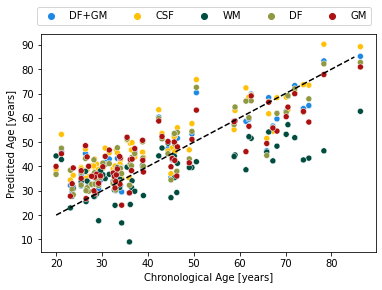

In [25]:
colors = ["#1E88E5", "#FFC107", "#004D40","#909842", "#AB1111"]
sns.scatterplot(x="age", y="y_hat", hue="modality", data=df, 
            palette=colors)
plt.plot([20, 85], [20, 85], 'k--')
plt.xlabel("Chronological Age [years]")
plt.ylabel("Predicted Age [years]")
plt.legend(ncol=5, bbox_to_anchor=(1, 1.15))
plt.savefig(f"predicted_age_vs_age.png")

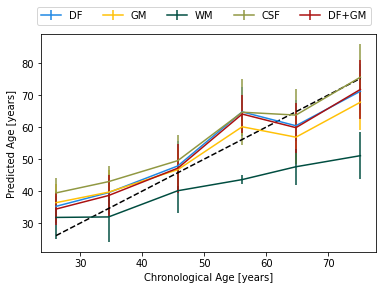

In [26]:
df["age_bin"] = df["age"].round(1).apply(lambda x: math.floor(x/10)*10)#.groupby("age")
df["age_bin"] = df["age_bin"] - (df["age_bin"]==80).astype(int)*10

df_plot_metrics = df.groupby(["age_bin", "modality"]).apply(lambda x: pd.Series([x["age"].mean(), x["y_hat"].mean(), x["y_hat"].std()],
                                                                      index=["age_mean", "y_hat_mean", "y_hat_std"])).reset_index()


for i, mod in enumerate(["DF", "GM", "WM", "CSF", "DF+GM"]):
    df_mod = df_plot_metrics.loc[df_plot_metrics.modality==mod]
    plt.errorbar(df_mod["age_mean"], df_mod["y_hat_mean"], yerr=df_mod["y_hat_std"], 
                 label=mod, color=colors[i])
plt.plot([df_plot_metrics["age_mean"].min(), df_plot_metrics["age_mean"].max()], [df_plot_metrics["age_mean"].min(), 
                                                                                  df_plot_metrics["age_mean"].max()], 'k--')
plt.xlabel("Chronological Age [years]")
plt.ylabel("Predicted Age [years]")
plt.legend(ncol=5, bbox_to_anchor=(1, 1.15))

In [39]:
df_groups = df.groupby(["modality", "age_bin"]).mean()[["age", "y_hat"]].round(2).reset_index()

df_groups["Difference [years]"] = (df_groups["age"] - df_groups["y_hat"]).round(2)
df_groups.rename(columns={"y_hat": "Mean predictions [years]", "age": "Mean age [years]",
                          "age_bin": "Age bin"}, inplace=True)

for el in df_groups.modality.unique():
    print(f"\n##########################            {el}            ##########################\n")
    print(df_groups.loc[df_groups.modality==el].loc[:, df_groups.columns!="modality"])
    print("\n")


##########################            CSF            ##########################

   Age bin  Mean age [years]  Mean predictions [years]  Difference [years]
0       20             26.09                     39.43              -13.34
1       30             34.56                     42.96               -8.40
2       40             45.74                     49.52               -3.78
3       50             56.12                     64.64               -8.52
4       60             64.79                     63.75                1.04
5       70             75.19                     75.59               -0.40



##########################            DF            ##########################

    Age bin  Mean age [years]  Mean predictions [years]  Difference [years]
6        20             26.09                     35.23               -9.14
7        30             34.56                     39.52               -4.96
8        40             45.74                     47.86               -2.12
9     